# Biodiversity in National Parks Project – Improved Scope

## 1. Problem Understanding
- **Definition:** Quantify and classify species observations across national parks.
- **Impacted Users:** Park management, conservationists, researchers, and policy makers.
- **Current Solutions & Gaps:** 
  - Many parks use manual or inconsistent data reporting.
  - Lack of integrated datasets combining species info ([species_info.csv](species_info.csv)) and observation data ([observations.csv](observations.csv)).
  - Gaps include insufficient species categorization and no system for trend analysis or prediction.

## 2. Project Goals
- **Classification:** Accurately classify species by category using the species information.
- **Quantification:** Tabulate and compare observations by species, category, and park.
- **Trend Analysis:** 
  - Verify the relationship between observation counts and conservation status.
  - Identify patterns (e.g., seasonal trends, changes after interventions).
- **Success Metrics:**
  - Data integration completeness and accuracy.
  - Timely delivery of automated reports and dashboards for stakeholders.
  - Increased insight leading to informed conservation decisions.

## 3. Data Strategy
- **Internal Data:**
  - *observations.csv*: Contains count data per species and park.
  - *species_info.csv*: Provides additional species metadata for categorization and conservation status.
- **External Data Augmentation:**
  - Public datasets on environmental conditions, climate, and park-specific habitat data.
- **Data Quality:**
  - Validate and clean data to ensure consistency, particularly regarding naming conventions and missing values.

## 4. Analysis and Validation
- **Descriptive Analysis:** 
  - Summarize species counts by category and park.
  - Create visualizations (bar charts, trend lines) to display current biodiversity metrics.
- **Correlational Analysis:**
  - Explore relationships between observation frequency and conservation status.
- **Predictive Analysis:**
  - Utilize statistical or machine learning methods to forecast future observation trends.
- **Validation:**
  - Cross-check against historical data and use on-site expert reviews.
  - Iterative testing and revision of analysis methods based on stakeholder feedback.

## 5. Ethical and Operational Considerations
- **Ethical Concerns:**
  - Ensure data privacy by anonymizing sensitive information.
  - Mitigate biases in presentation and interpretation of species conservation status.
  - Maintain transparency by documenting all data sources, methods, and decisions.
- **Deployment and Sustainability:**
  - Deploy the analysis via an integrated dashboard to support real-time decision-making.
  - Develop an automated pipeline for data updates and system integration.
  - Establish monitoring routines and feedback loops to continually refine the system.
  - Evaluate system performance with key performance indicators (KPIs) and periodic reviews.

In [1]:
# Load required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
%matplotlib inline

sns.set_theme(style='darkgrid')

# Load datasets
observations_data = pd.read_csv('observations.csv')
species_data = pd.read_csv('species_info.csv')

# Display first few rows
observations_data.head()

,scientific_name,park_name,observations
0,Vicia benghalensis,Great Smoky Mountains National Park,68
1,Neovison vison,Great Smoky Mountains National Park,77
2,Prunus subcordata,Yosemite National Park,138
3,Abutilon theophrasti,Bryce National Park,84
4,Githopsis specularioides,Great Smoky Mountains National Park,85


In [2]:
species_data.head()

,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN
1,Mammal,Bos bison,"American Bison, Bison",NaN
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",NaN
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",NaN
4,Mammal,Cervus elaphus,Wapiti Or Elk,NaN


In [3]:
# Display summary statistics for the observations dataset
observations_data.describe(include='all')

,scientific_name,park_name,observations
count,23296,23296,23296.000000
unique,5541,4,NaN
top,Myotis lucifugus,Great Smoky Mountains National Park,NaN
freq,12,5824,NaN
mean,NaN,NaN,142.287904
std,NaN,NaN,69.890532
min,NaN,NaN,9.000000
25%,NaN,NaN,86.000000
50%,NaN,NaN,124.000000
75%,NaN,NaN,195.000000


In [4]:
# Check for missing values in the observations dataset
observations_data.isnull().sum()

scientific_name    0
park_name          0
observations       0
dtype: int64

In [5]:
species_data.describe(include='all')

,category,scientific_name,common_names,conservation_status
count,5824,5824,5824,191
unique,7,5541,5504,4
top,Vascular Plant,Castor canadensis,Brachythecium Moss,Species of Concern
freq,4470,3,7,161


In [6]:
species_data.conservation_status.unique()

array([nan, 'Species of Concern', 'Endangered', 'Threatened',
       'In Recovery'], dtype=object)

In [7]:
species_data.conservation_status.fillna('Non-threatened species', inplace=True)
species_data.describe(include='all')

/tmp/ipykernel_47829/4175870000.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  species_data.conservation_status.fillna('Non-threatened species', inplace=True)


,category,scientific_name,common_names,conservation_status
count,5824,5824,5824,5824
unique,7,5541,5504,5
top,Vascular Plant,Castor canadensis,Brachythecium Moss,Non-threatened species
freq,4470,3,7,5633


In [8]:
species_data.scientific_name.unique()

array(['Clethrionomys gapperi gapperi', 'Bos bison', 'Bos taurus', ...,
       'Parthenocissus vitacea', 'Vitis californica',
       'Tribulus terrestris'], dtype=object)

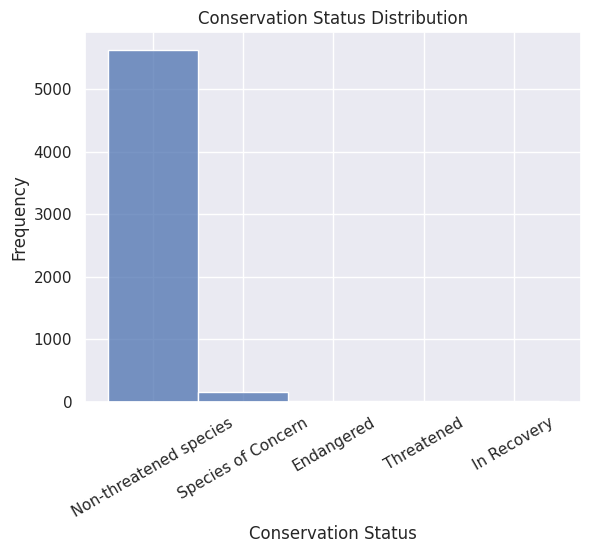

In [9]:
ax = sns.histplot(x='conservation_status', data=species_data)
ax.set_xticks(ax.get_xticks())
ax.set_xticklabels(species_data.conservation_status.unique(), rotation=30)
plt.xlabel('Conservation Status')
plt.ylabel('Frequency')
plt.title('Conservation Status Distribution')
plt.show()
plt.close()

In [10]:
species_data.duplicated().sum()

0

In [11]:
observations_data.duplicated().sum()

15

In [12]:
observations_data.drop_duplicates(inplace=True)

In [13]:
species_data.groupby('category').scientific_name.count()

category
Amphibian              80
Bird                  521
Fish                  127
Mammal                214
Nonvascular Plant     333
Reptile                79
Vascular Plant       4470
Name: scientific_name, dtype: int64

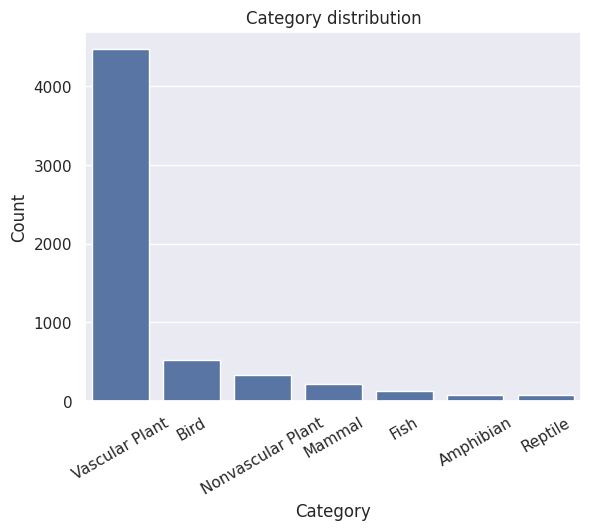

In [14]:
# Calculate the counts and ordenate
category_counts = species_data.groupby('category').scientific_name.count().sort_values(ascending=False)

ax = sns.barplot(x=category_counts.index, y=category_counts.values)
plt.xlabel('Category')
plt.ylabel('Count')
ax.set_xticks(ax.get_xticks())
ax.set_xticklabels(category_counts.index, rotation=30)
plt.title('Category distribution')
plt.show()
plt.close()

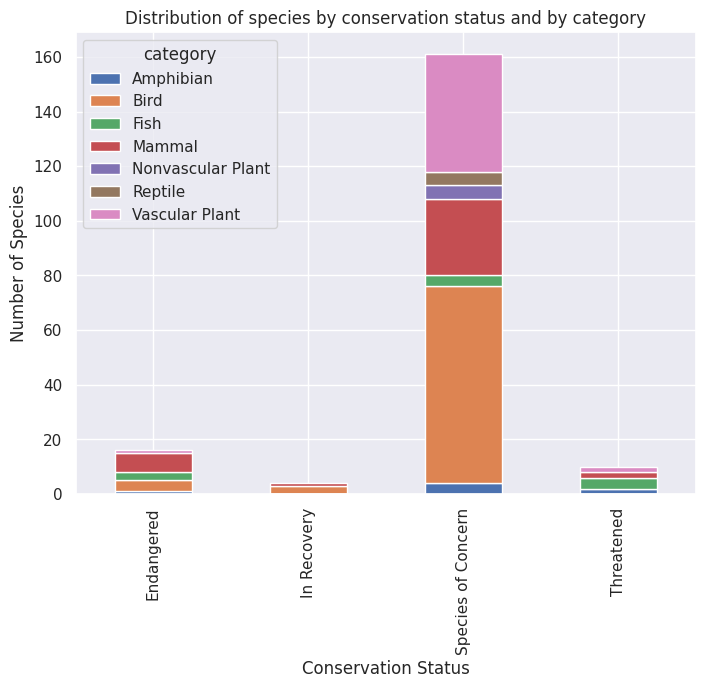

In [16]:
conservationCategory = species_data[species_data.conservation_status != "Non-threatened species"]\
    .groupby(["conservation_status", "category"])['scientific_name']\
    .count()\
    .unstack()

ax = conservationCategory.plot(kind = 'bar', figsize=(8,6), 
                               stacked=True)
ax.set_xlabel("Conservation Status")
ax.set_ylabel("Number of Species")
ax.set_title("Distribution of species by conservation status and by category")
plt.show()

Vascular plant has the most species cataloged in the dataset, for animals, bird has the most species. Reptile and amphibian has the least.

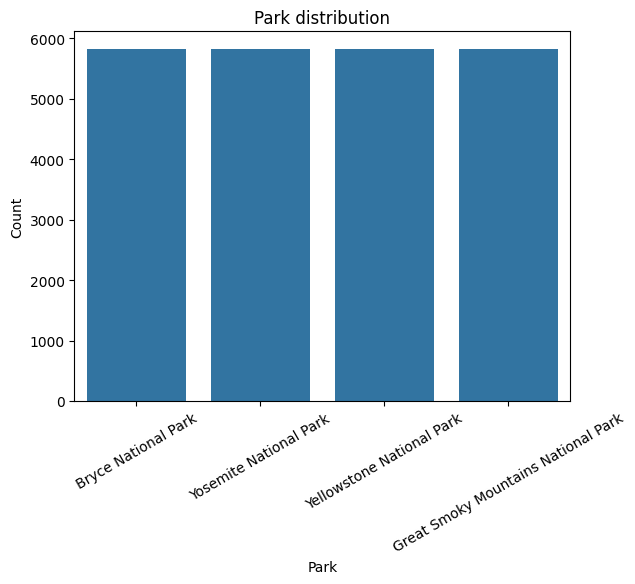

In [18]:
park_counts = observations_data.groupby('park_name').scientific_name.count().sort_values(ascending=False)

ax = sns.barplot(x=park_counts.index, y=park_counts.values)
plt.xlabel('Park')
plt.ylabel('Count')
ax.set_xticks(ax.get_xticks())
ax.set_xticklabels(park_counts.index, rotation=30)
plt.title('Park distribution')
plt.show()
plt.close()

As we can see, all the parks in the study has the same proportion of species.

In [19]:
observations_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23281 entries, 0 to 23295
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   scientific_name  23281 non-null  object
 1   park_name        23281 non-null  object
 2   observations     23281 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 727.5+ KB


In [20]:
species_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5824 entries, 0 to 5823
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   category             5824 non-null   object
 1   scientific_name      5824 non-null   object
 2   common_names         5824 non-null   object
 3   conservation_status  5824 non-null   object
dtypes: object(4)
memory usage: 182.1+ KB


In [21]:
species_observations_data = observations_data.merge(species_data, how='left')
species_observations_data.head()

,scientific_name,park_name,observations,category,common_names,conservation_status
0,Vicia benghalensis,Great Smoky Mountains National Park,68,Vascular Plant,"Purple Vetch, Reddish Tufted Vetch",Non-threatened species
1,Neovison vison,Great Smoky Mountains National Park,77,Mammal,American Mink,Non-threatened species
2,Prunus subcordata,Yosemite National Park,138,Vascular Plant,Klamath Plum,Non-threatened species
3,Abutilon theophrasti,Bryce National Park,84,Vascular Plant,Velvetleaf,Non-threatened species
4,Githopsis specularioides,Great Smoky Mountains National Park,85,Vascular Plant,Common Bluecup,Non-threatened species


In [22]:
species_observations_data.index.nunique()

25601

In [23]:
category_observations = species_observations_data.groupby('category').observations.sum().sort_values(ascending=False)
category_observations.head()

category
Vascular Plant       2791714
Bird                  331606
Nonvascular Plant     190653
Mammal                162608
Fish                   72901
Name: observations, dtype: int64

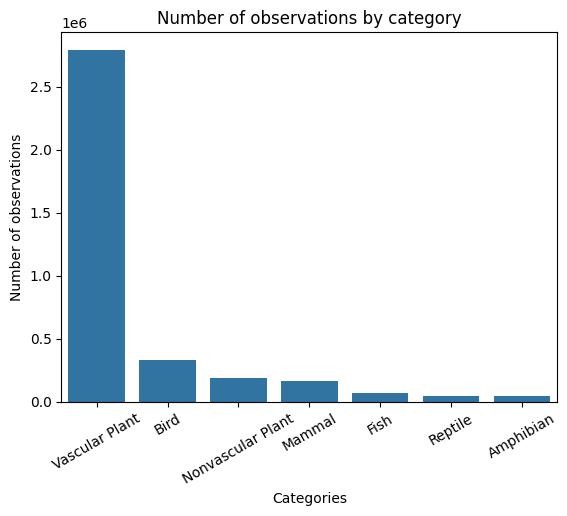

In [24]:
ax = sns.barplot(x=category_observations.index, y=category_observations)
plt.xlabel('Categories')
plt.ylabel('Number of observations')
plt.title('Number of observations by category')
ax.set_xticks(ax.get_xticks())
ax.set_xticklabels(category_observations.index, rotation=30)
plt.show()
plt.close()

Vascular Plants has the most observations overall, whereas Amphibian has the least.

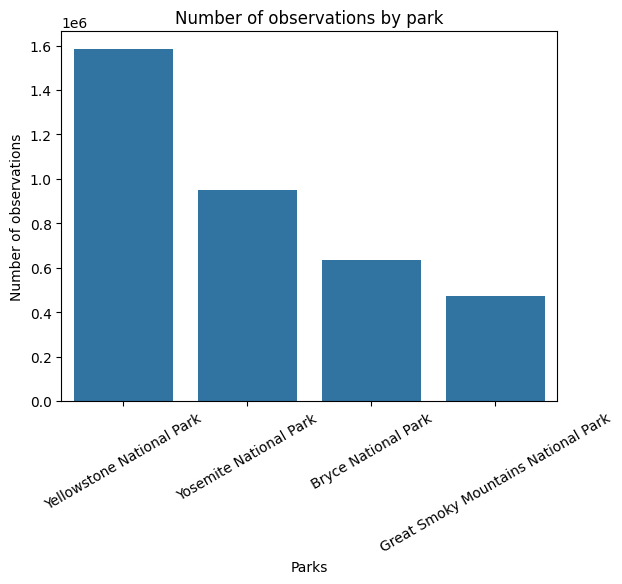

In [25]:
park_observations = species_observations_data.groupby('park_name').observations.sum().sort_values(ascending=False)

ax = sns.barplot(x=park_observations.index, y=park_observations)
plt.xlabel('Parks')
plt.ylabel('Number of observations')
plt.title('Number of observations by park')
ax.set_xticks(ax.get_xticks())
ax.set_xticklabels(park_observations.index, rotation=30)
plt.show()
plt.close()

Yellowstone National Park has the most observations overall, while Great Smoky Mountains National Park has the least.

In [26]:
park_category_observations = species_observations_data.groupby(['park_name', 'category']).observations.sum().sort_values(ascending=False).reset_index()
park_category_observations.head()

,park_name,category,observations
0,Yellowstone National Park,Vascular Plant,1216688
1,Yosemite National Park,Vascular Plant,726903
2,Bryce National Park,Vascular Plant,484125
3,Great Smoky Mountains National Park,Vascular Plant,363998
4,Yellowstone National Park,Bird,143535


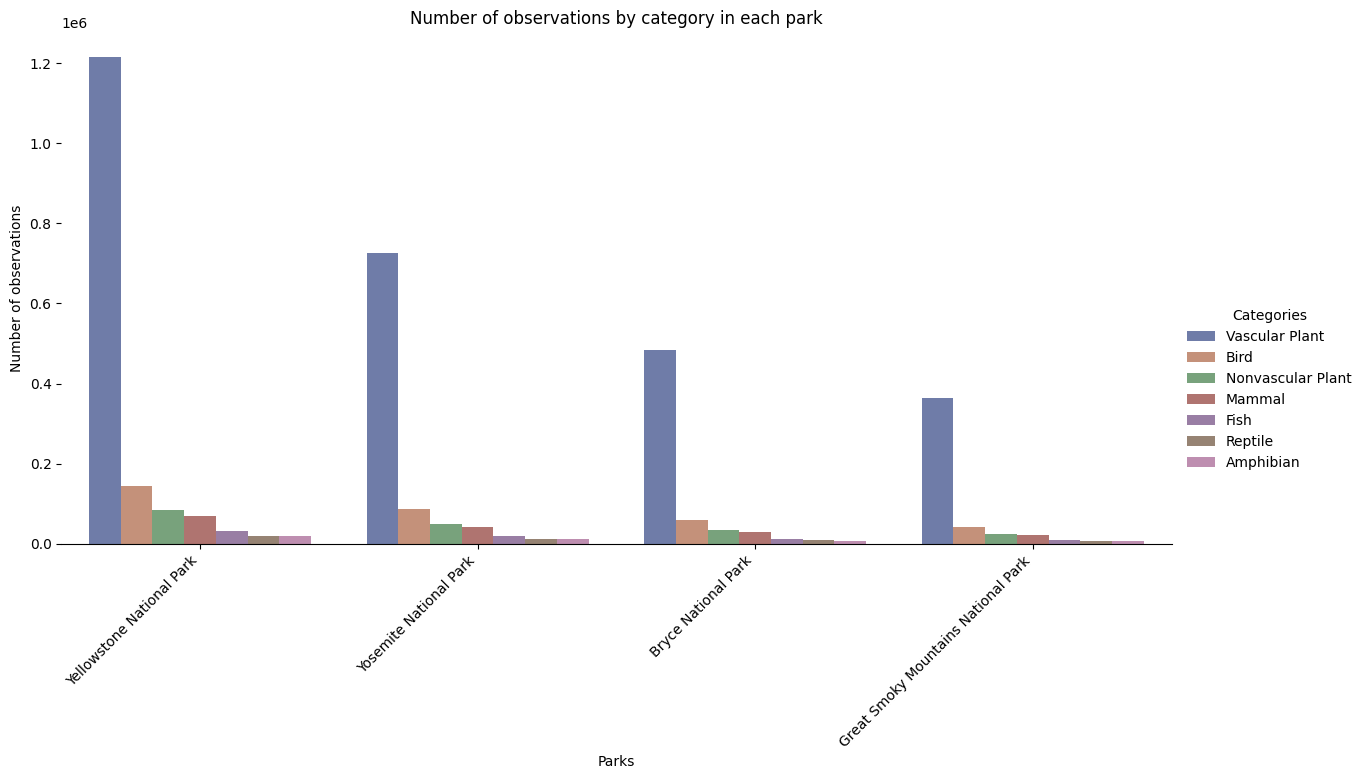

In [27]:
g = sns.catplot(x='park_name', y='observations', hue='category', data=park_category_observations, kind='bar', palette='dark', alpha=.6, height=6, aspect=2)
g.despine(left=True)
g.set_axis_labels("Parks", "Number of observations")
g.legend.set_title("Categories")
g.ax.set_title('Number of observations by category in each park')
g.ax.set_xticks(g.ax.get_xticks())
g.ax.set_xticklabels(g.ax.get_xticklabels(), rotation=45, ha='right')
plt.show()
plt.close()

In [29]:
conservation_observations = species_observations_data.groupby(['conservation_status', 'category']).observations.sum().sort_values(ascending=False).reset_index()
conservation_observations.head()

,conservation_status,category,observations
0,Non-threatened species,Vascular Plant,2768865
1,Non-threatened species,Bird,288882
2,Non-threatened species,Nonvascular Plant,187948
3,Non-threatened species,Mammal,137462
4,Non-threatened species,Fish,68692


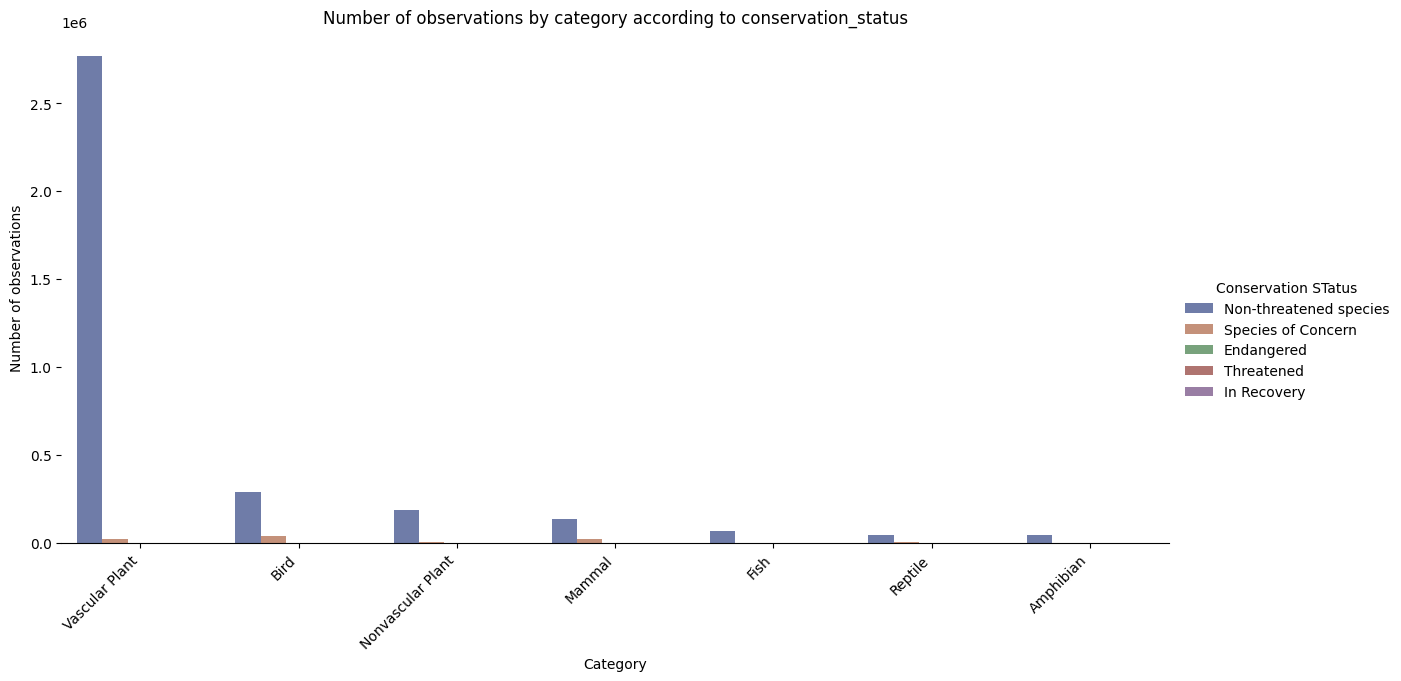

In [30]:
data = conservations_observations[conservations_observations.conservation_status != 'Non-threatened species']
g = sns.catplot(x='category', y='observations', hue='conservation_status', data=conservation_observations, kind='bar', palette='dark', alpha=.6, height=6, aspect=2)
g.despine(left=True)
g.set_axis_labels("Category", "Number of observations")
g.legend.set_title("Conservation STatus")
g.ax.set_title('Number of observations by category according to conservation_status')
g.ax.set_xticks(g.ax.get_xticks())
g.ax.set_xticklabels(g.ax.get_xticklabels(), rotation=45, ha='right')
plt.show()
plt.close()

In [31]:
import scipy.stats as stats
import statsmodels.api as sm

conservation_observations = species_observations_data.groupby(['conservation_status', 'scientific_name']).observations.sum().sort_values(ascending=False).reset_index()
model = sm.OLS.from_formula('observations ~ C(conservation_status)', data=conservation_observations).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
C(conservation_status),4.011375e+06,4.0,6.245712,0.000052
Residual,8.892097e+08,5538.0,NaN,NaN


As p-value=0.000061 << 0.05, we can say that there is a considerable diference between the groups, reinforcing the idea that the two variables are correleted.

In [32]:
kruskal_test = stats.kruskal(
    *[conservation_observations[conservation_observations['conservation_status'] == grupo]['observations'] for grupo in conservation_observations['conservation_status'].unique()]
)
kruskal_test

KruskalResult(statistic=243.7292537421161, pvalue=1.459795016736159e-51)

In [33]:
ss_total = np.sum((conservation_observations['observations'] - np.mean(conservation_observations['observations']))**2)
ss_between = np.sum((conservation_observations.groupby('conservation_status')['observations'].mean() - np.mean(conservation_observations['observations']))**2) * conservation_observations['conservation_status'].value_counts()
eta_squared = ss_between.sum() / ss_total

In [34]:
print("ANOVA:\n", anova_table)
print("\nKruskal-Wallis Teste:\n", kruskal_test)
print("\nEta² (Força da correlação):", eta_squared)

ANOVA:
                               sum_sq      df         F    PR(>F)
C(conservation_status)  4.011375e+06     4.0  6.245712  0.000052
Residual                8.892097e+08  5538.0       NaN       NaN

Kruskal-Wallis Teste:
 KruskalResult(statistic=243.7292537421161, pvalue=1.459795016736159e-51)

Eta² (Força da correlação): 1.8671512362907805


Both ANOVA and Kruskal-Wallis test indicates a correlation between the variables conservation_status and observations, meanwhile the Eta-squared indicates a very strong correlation between the variables.

In [36]:
data = observations_data.merge(species_data, on="scientific_name", how="left")

# Encode the categoric variables
label_encoders = {}
for col in ["park_name", "category", "conservation_status"]:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

# Define X (input) and Y (output)
X = data[["park_name", "category", "conservation_status"]]
y = data["observations"]

# Split the training data into train (80%) an test (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train a Random Forest Regressor Model to estimate the number of observations
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [37]:
# Predict using the Model
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error (MAE): {mae:.2f}')

Mean Absolute Error (MAE): 16.12


In [38]:
y_baseline = [y_train.mean()] * len(y_test)

# Calculate the baseline error
baseline_mae = mean_absolute_error(y_test, y_baseline)

print(f'Baseline MAE {baseline_mae:.2f}')

Baseline MAE 59.04


Comparing the baseline model MAE with ours model MAE, we can observe that ours has a much smaller error.